In [159]:
# Expression difference data
expr_hvg <- read.csv("nose_jaw_hvg_diff_df.csv", row.names = 1)
expr_spatial <- read.csv("nose_jaw_spatial_diff_df.csv", row.names = 1)
expr_full <- read.csv("nose_jaw_full_diff_df.csv", row.names = 1)

# SNP score data
snp_hvg <- read.csv("genes_with_SNP_scores_hvg.csv")
snp_spatial <- read.csv("genes_with_SNP_scores_spatial.csv")
snp_full <- read.csv("genes_with_SNP_scores_full.csv")

In [160]:
expr_hvg$gene <- rownames(expr_hvg)
expr_spatial$gene <- rownames(expr_spatial)
expr_full$gene <- rownames(expr_full)

In [161]:
# For HVG set
merged_hvg <- merge(
  snp_hvg, 
  expr_hvg[, c("gene", "X16_nose_ant")], 
  by = "gene", 
  all = FALSE
)

# For spatial set
merged_spatial <- merge(
  snp_spatial, 
  expr_spatial[, c("gene", "X16_nose_ant")], 
  by = "gene", 
  all = FALSE
)

# For spatial set
merged_full <- merge(
  snp_full, 
  expr_full[, c("gene", "X16_nose_ant")], 
  by = "gene", 
  all = FALSE
)



`geom_smooth()` using formula = 'y ~ x'


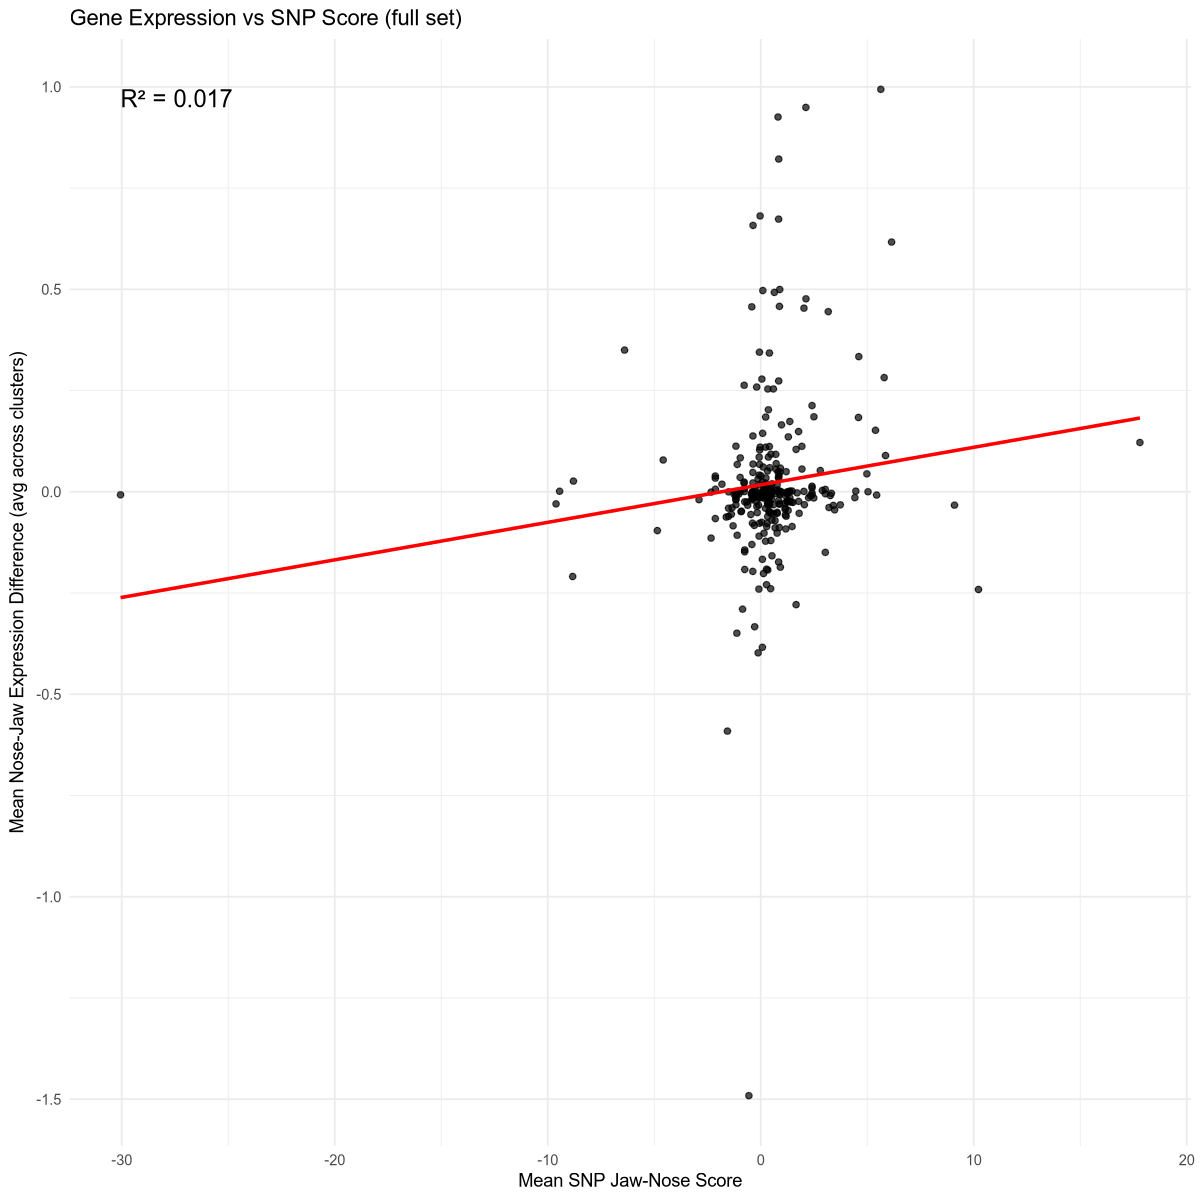

In [162]:
library(ggplot2)

# Calculate R squared
fit <- lm(X16_nose_ant ~ score_avg, data = merged_full)
r2 <- summary(fit)$r.squared

ggplot(merged_full, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(merged_full$score_avg, na.rm = TRUE),
           y = max(merged_full$X16_nose_ant, na.rm = TRUE),
           label = paste0("R² = ", round(r2, 3)),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (avg across clusters)",
    title = "Gene Expression vs SNP Score (full set)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


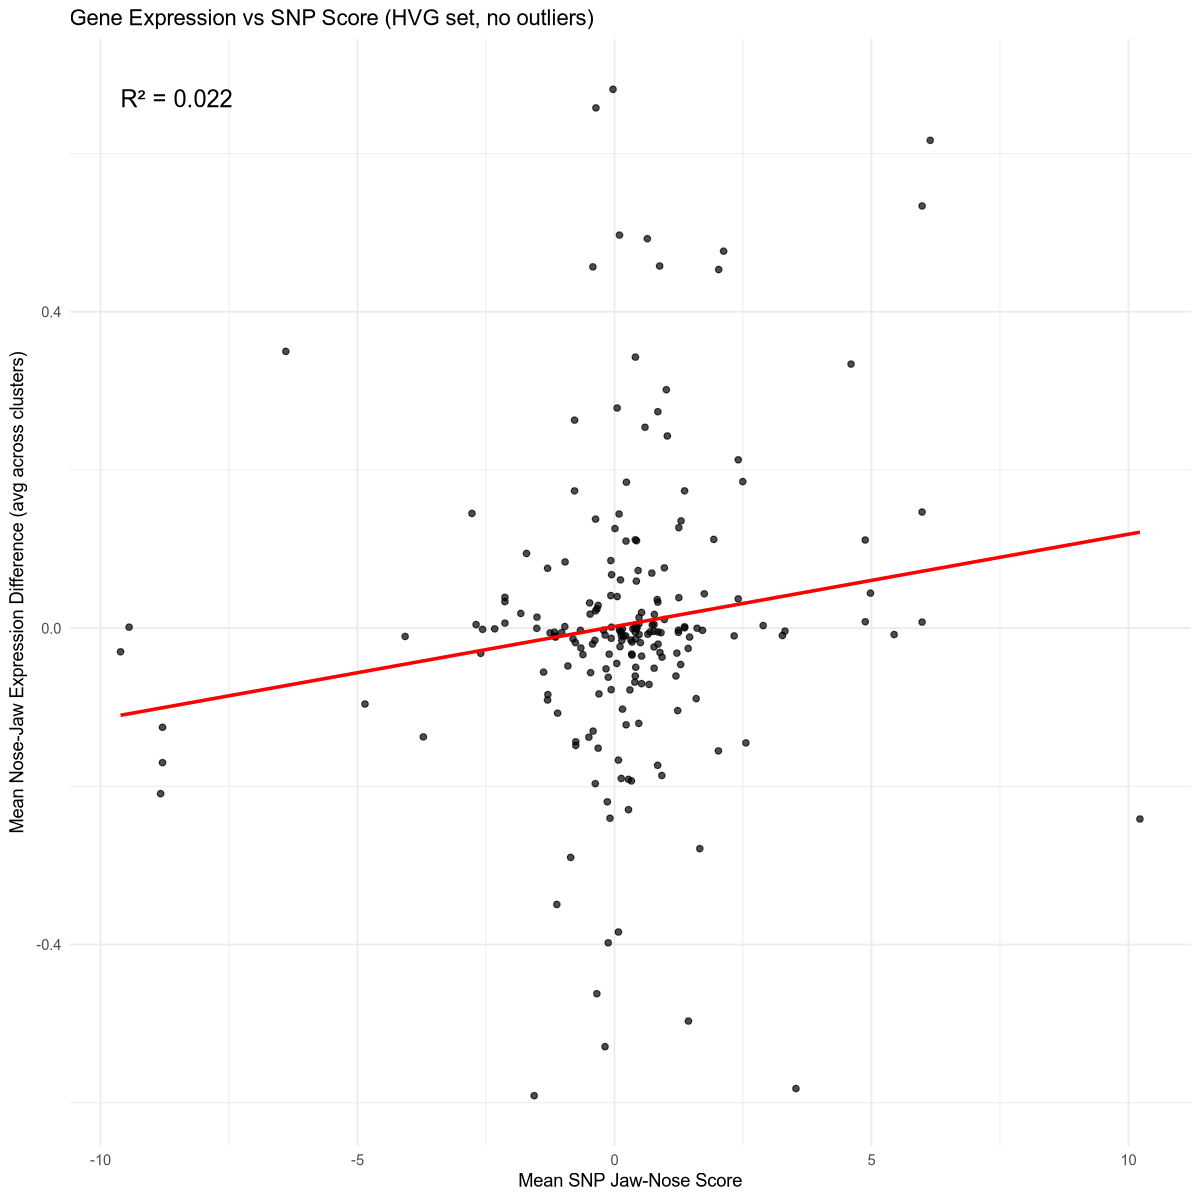

In [163]:
# Calculate z-scores for both variables
z_score_x <- scale(merged_hvg$score_avg)
z_score_y <- scale(merged_hvg$X16_nose_ant)

# Keep only points within 3 SDs of the mean (change threshold if desired)
is_not_outlier <- abs(z_score_x) <= 3 & abs(z_score_y) <= 3

# Filter out outliers
merged_hvg_no_outliers <- merged_hvg[is_not_outlier, ]

# Calculate R squared for non-outliers only
fit <- lm(X16_nose_ant ~ score_avg, data = merged_hvg_no_outliers)
r2 <- summary(fit)$r.squared

ggplot(merged_hvg_no_outliers, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(merged_hvg_no_outliers$score_avg, na.rm = TRUE),
           y = max(merged_hvg_no_outliers$X16_nose_ant, na.rm = TRUE),
           label = paste0("R² = ", round(r2, 3)),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (avg across clusters)",
    title = "Gene Expression vs SNP Score (HVG set, no outliers)"
  ) +
  theme_minimal()



`geom_smooth()` using formula = 'y ~ x'


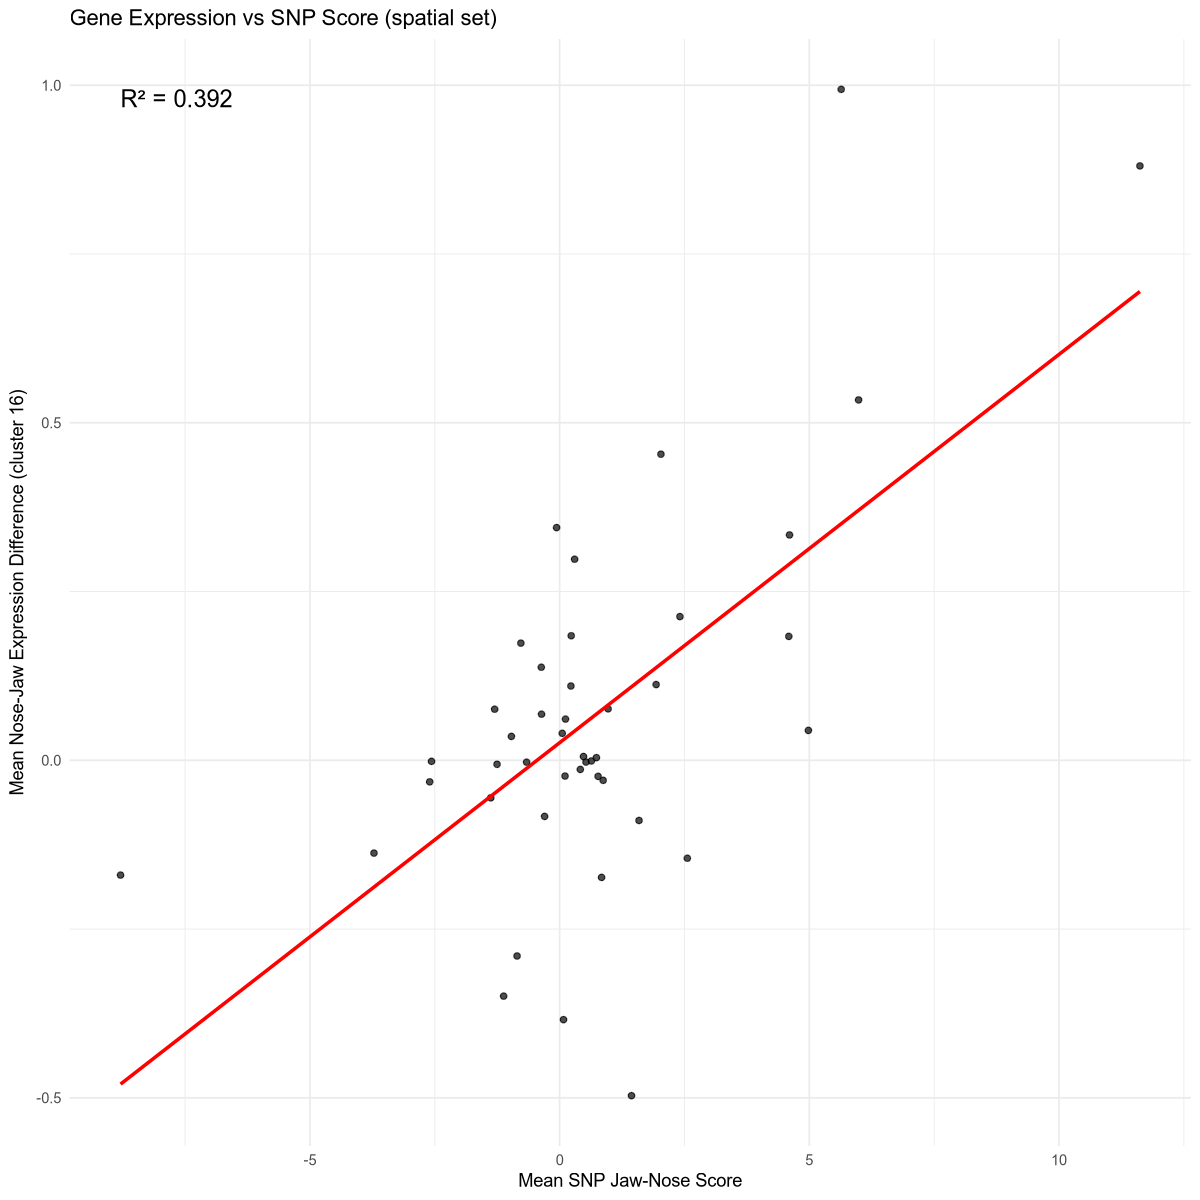

In [164]:
library(ggplot2)

# Calculate R squared
fit <- lm(X16_nose_ant ~ score_avg, data = merged_spatial)
r2 <- summary(fit)$r.squared

ggplot(merged_spatial, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(merged_spatial$score_avg, na.rm = TRUE),
           y = max(merged_spatial$X16_nose_ant, na.rm = TRUE),
           label = paste0("R² = ", round(r2, 3)),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (cluster 16)",
    title = "Gene Expression vs SNP Score (spatial set)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


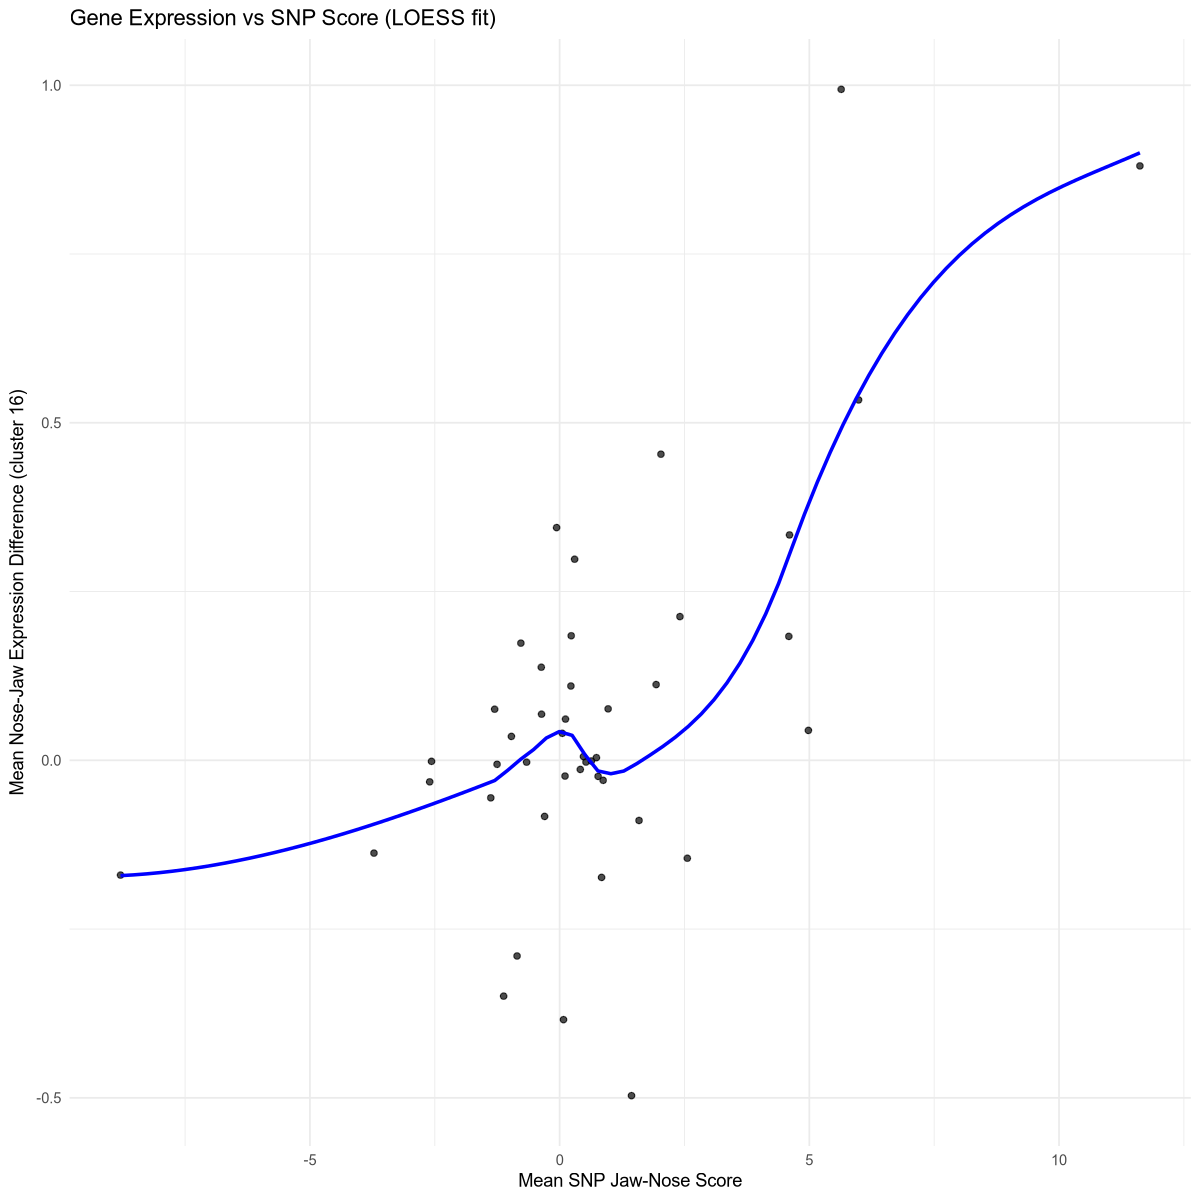

In [165]:
ggplot(merged_spatial, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "loess", color = "blue", se = FALSE) +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (cluster 16)",
    title = "Gene Expression vs SNP Score (LOESS fit)"
  ) +
  theme_minimal()


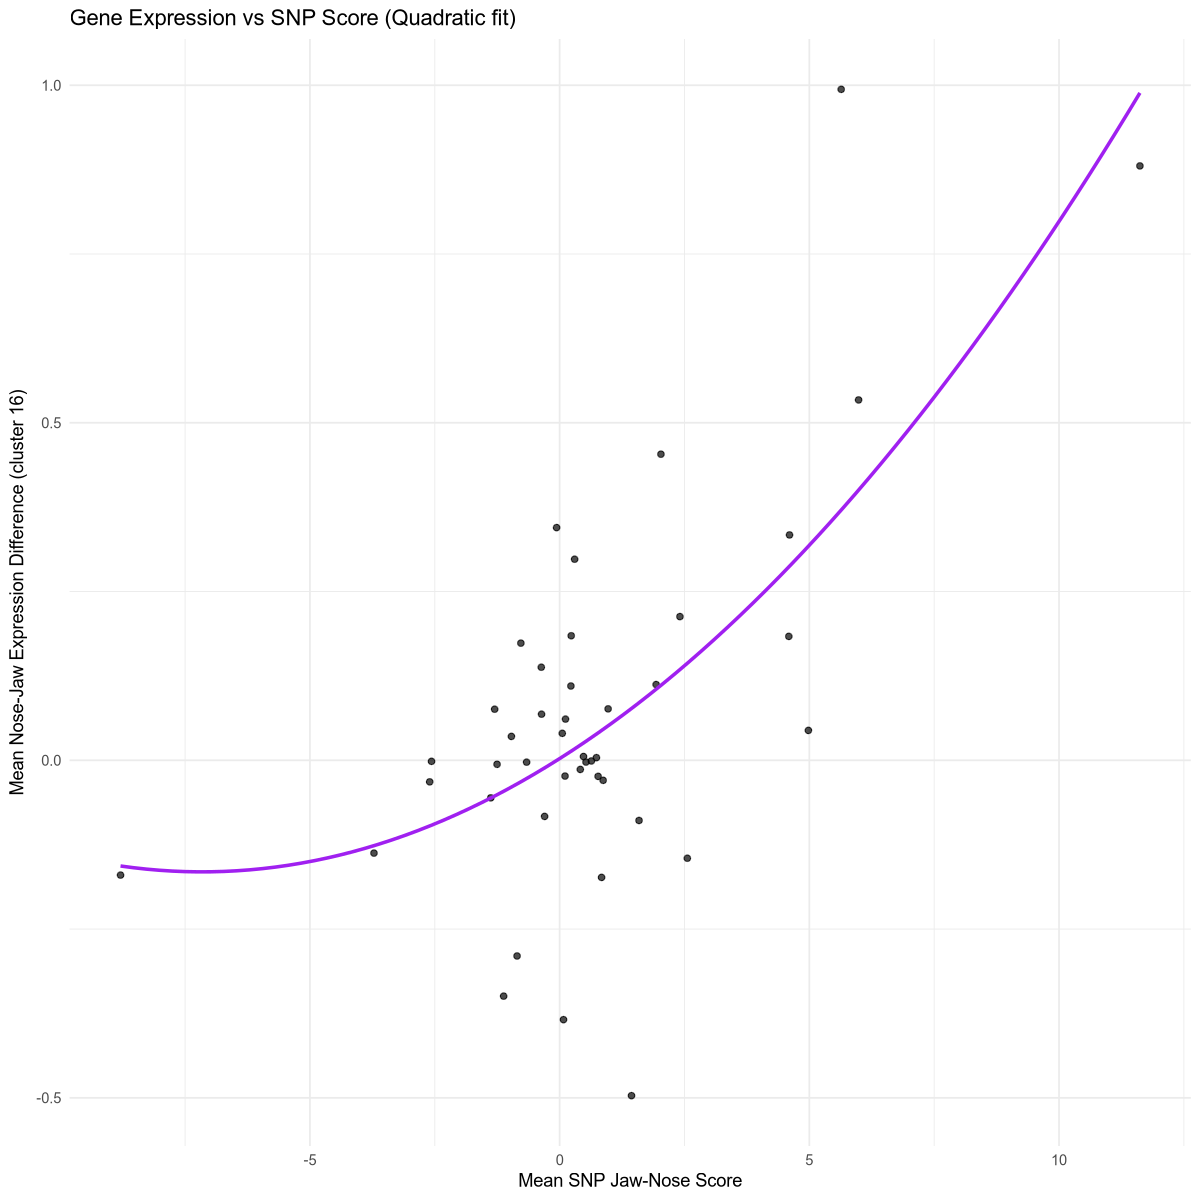

In [166]:
ggplot(merged_spatial, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "purple", se = FALSE) +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (cluster 16)",
    title = "Gene Expression vs SNP Score (Quadratic fit)"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


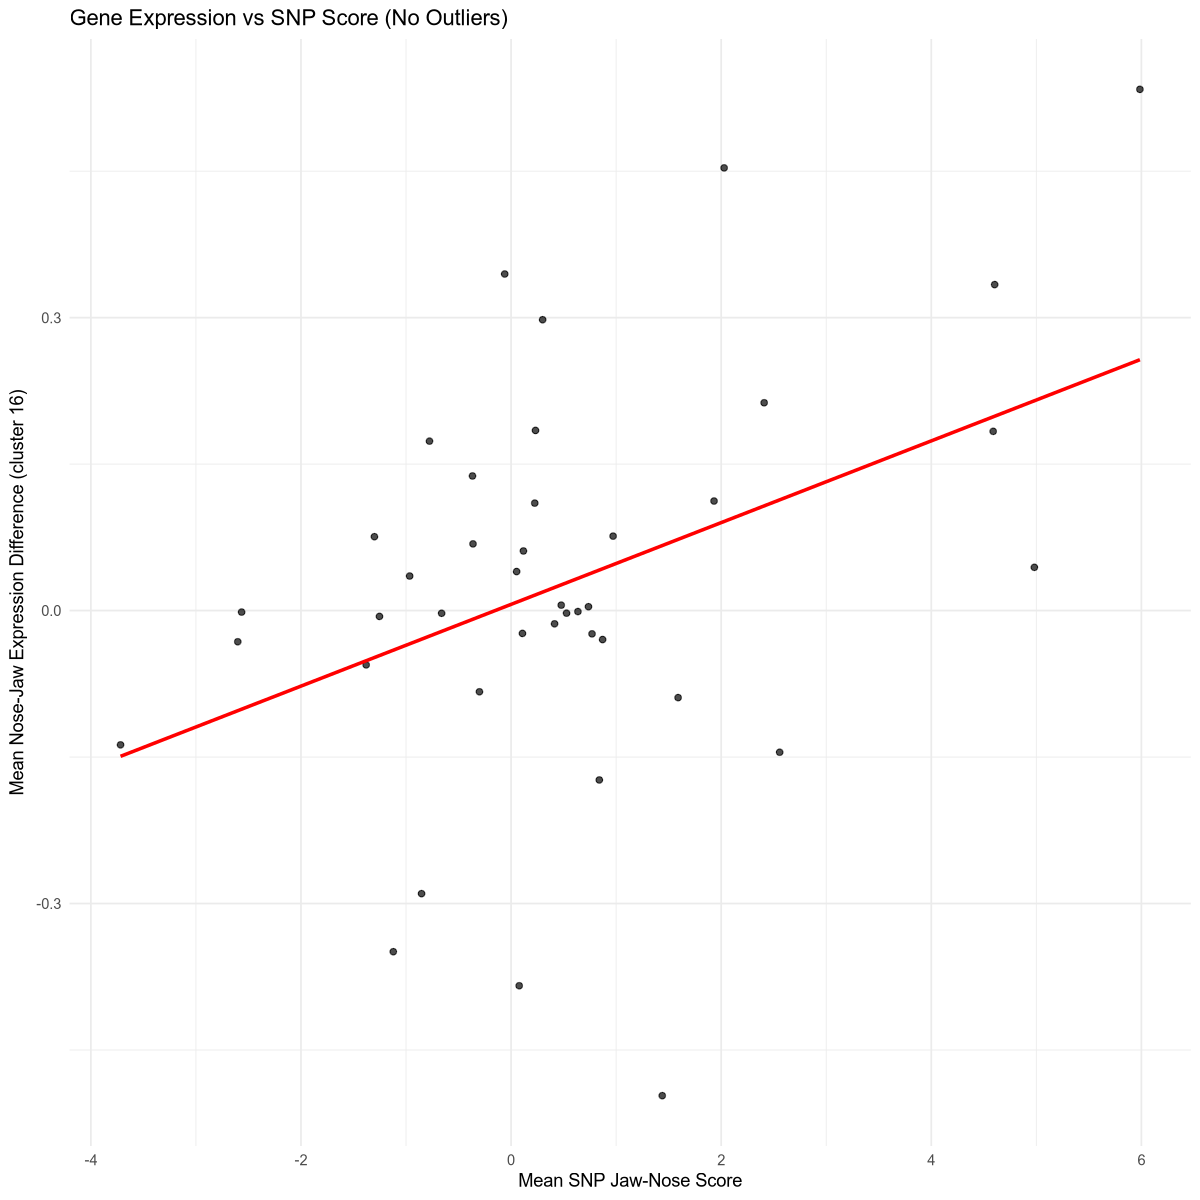

In [167]:
# Calculate z-scores for both variables
z_score_x <- scale(merged_spatial$score_avg)
z_score_y <- scale(merged_spatial$X16_nose_ant)

# Define outliers as points where |z| > 3 (customize threshold as needed)
is_not_outlier <- abs(z_score_x) <= 3 & abs(z_score_y) <= 3

# Filter your dataframe
merged_spatial_no_outliers <- merged_spatial[is_not_outlier, ]

# Plot (no outliers)
ggplot(merged_spatial_no_outliers, aes(x = score_avg, y = X16_nose_ant)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Mean Nose-Jaw Expression Difference (cluster 16)",
    title = "Gene Expression vs SNP Score (No Outliers)"
  ) +
  theme_minimal()


In [212]:
# Summary stats
cat("Summary of score_avg:\n")
print(summary(merged_spatial_no_outliers$score_avg))
cat("SD of score_avg:", sd(merged_spatial_no_outliers$score_avg, na.rm = TRUE), "\n\n")

cat("Summary of X16_nose_ant:\n")
print(summary(merged_spatial_no_outliers$X16_nose_ant))
cat("SD of X16_nose_ant:", sd(merged_spatial_no_outliers$X16_nose_ant, na.rm = TRUE), "\n\n")

cat("N (number of genes):", nrow(merged_spatial_no_outliers), "\n\n")

# Correlation and regression
cor_test <- cor.test(merged_spatial_no_outliers$score_avg, merged_spatial_no_outliers$X16_nose_ant)
fit <- lm(X16_nose_ant ~ score_avg, data = merged_spatial_no_outliers)
fit_sum <- summary(fit)

cat("Pearson correlation (r):", cor_test$estimate, "\n")
cat("Pearson correlation p-value:", cor_test$p.value, "\n\n")

cat("Regression slope:", fit_sum$coefficients["score_avg", "Estimate"], "\n")
cat("Regression intercept:", fit_sum$coefficients["(Intercept)", "Estimate"], "\n")
cat("Regression R²:", fit_sum$r.squared, "\n")
cat("Regression slope p-value:", fit_sum$coefficients["score_avg", "Pr(>|t|)"], "\n")


Summary of score_avg:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.7177 -0.6611  0.2325  0.5168  0.9713  5.9860 
SD of score_avg: 1.988985 

Summary of X16_nose_ant:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.496757 -0.031892  0.003979  0.028016  0.112198  0.533801 
SD of X16_nose_ant: 0.2049774 

N (number of genes): 41 

Pearson correlation (r): 0.4061499 
Pearson correlation p-value: 0.008417393 

Regression slope: 0.0418563 
Regression intercept: 0.006383847 
Regression R²: 0.1649577 
Regression slope p-value: 0.008417393 


In [168]:
# Run the linear regression
fit <- lm(X16_nose_ant ~ score_avg, data = merged_spatial)

# View the summary (shows p-value for score_avg under 'Pr(>|t|)')
summary(fit)


Call:
lm(formula = X16_nose_ant ~ score_avg, data = merged_spatial)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60561 -0.09246  0.01003  0.12107  0.64351 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02607    0.03388   0.770    0.446    
score_avg    0.05752    0.01105   5.204 5.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2192 on 42 degrees of freedom
Multiple R-squared:  0.392,	Adjusted R-squared:  0.3775 
F-statistic: 27.08 on 1 and 42 DF,  p-value: 5.484e-06


In [169]:
# Extract the p-value for the slope
summary(fit)$coefficients["score_avg", "Pr(>|t|)"]


[1] 5.484345e-06

In [170]:
# Run the linear regression
fit <- lm(X16_nose_ant ~ score_avg, data = merged_hvg)

# View the summary (shows p-value for score_avg under 'Pr(>|t|)')
summary(fit)


Call:
lm(formula = X16_nose_ant ~ score_avg, data = merged_hvg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49610 -0.07062 -0.02131  0.04647  0.92298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.010610   0.016640   0.638   0.5244  
score_avg   0.010694   0.004298   2.488   0.0136 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2412 on 210 degrees of freedom
Multiple R-squared:  0.02863,	Adjusted R-squared:  0.024 
F-statistic:  6.19 on 1 and 210 DF,  p-value: 0.01363


In [171]:
# Count number of times score_avg and avg_score have the same sign
sum(sign(merged_hvg$score_avg) == sign(merged_hvg$X16_nose_ant) & !is.na(merged_hvg$score_avg) & !is.na(merged_hvg$X16_nose_ant))


[1] 113

In [172]:
#trying to plot all clusters together

In [173]:
expr_long <- expr_long %>%
  left_join(snp_spatial[, c("gene", "score_avg")], by = "gene")


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 18368 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 18368 rows containing missing values or values outside the scale range
(`geom_point()`).”


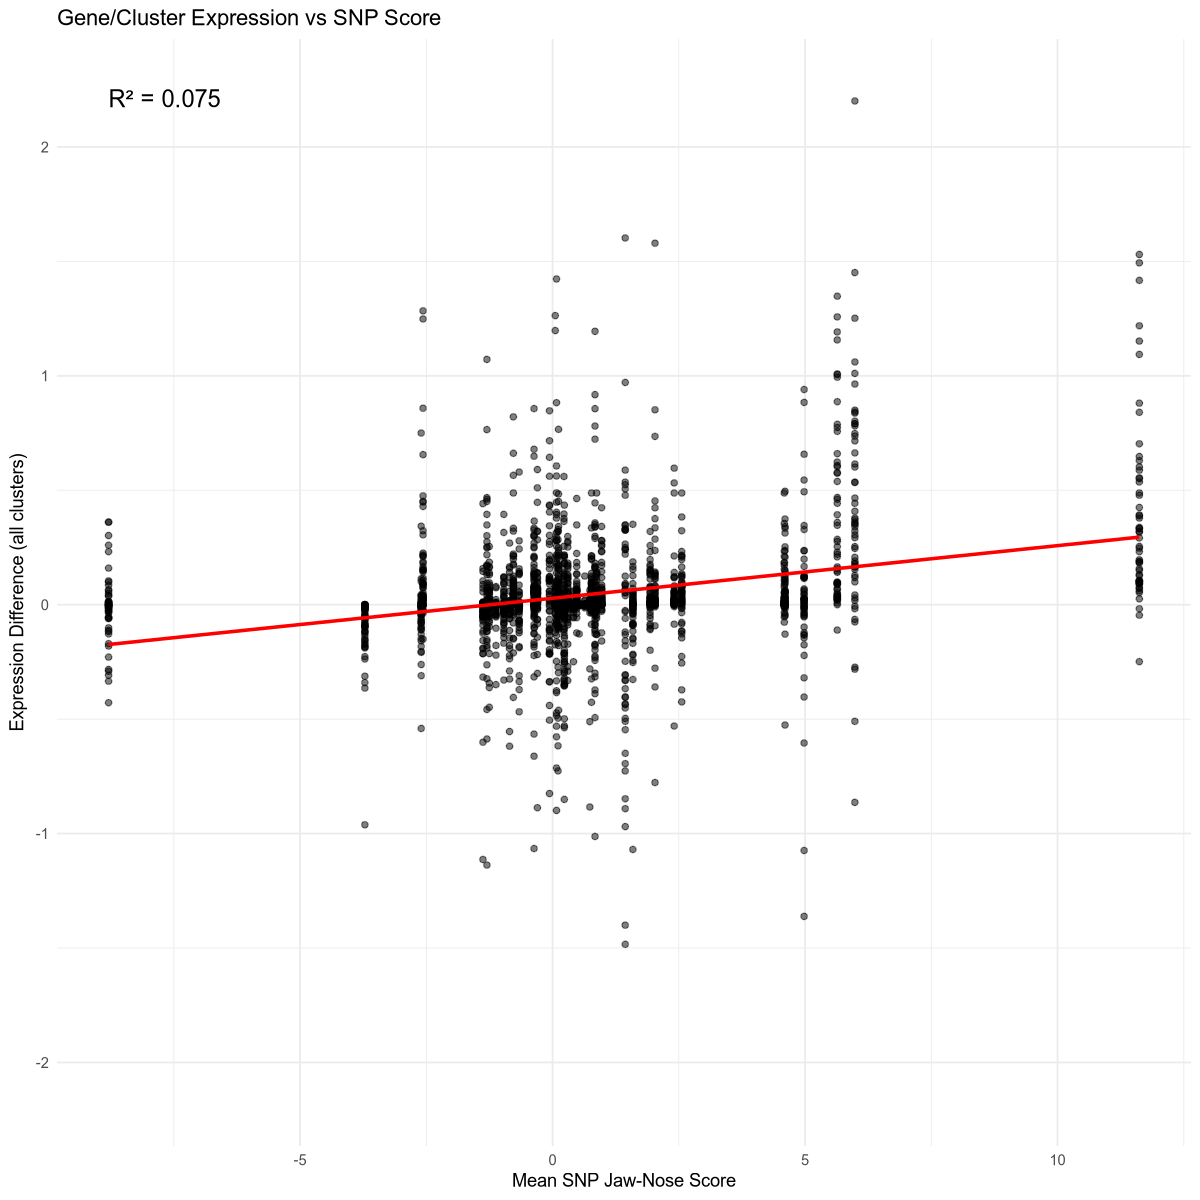

In [174]:
# Calculate R squared for all points
fit <- lm(expr_diff ~ score_avg, data = expr_long)
r2 <- summary(fit)$r.squared

# Plot with R² annotation
ggplot(expr_long, aes(x = score_avg, y = expr_diff)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(expr_long$score_avg, na.rm = TRUE),
           y = max(expr_long$expr_diff, na.rm = TRUE),
           label = paste0("R² = ", round(r2, 3)),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference (all clusters)",
    title = "Gene/Cluster Expression vs SNP Score"
  ) +
  theme_minimal()


In [175]:
# Example: select clusters by name or pattern (adjust as needed)
#clusters_to_plot <- c("X14_nose_ant", "X16_nose_ant" , "X2_nose_ant", "X27_nose_ant" , "X34_nose_ant" , "X22_nose_ant", "X9_nose_ant")
clusters_to_plot <- c("X16_nose_ant")
# Filter your long dataframe
expr_long_sub <- expr_long[expr_long$cluster %in% clusters_to_plot, ]


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”


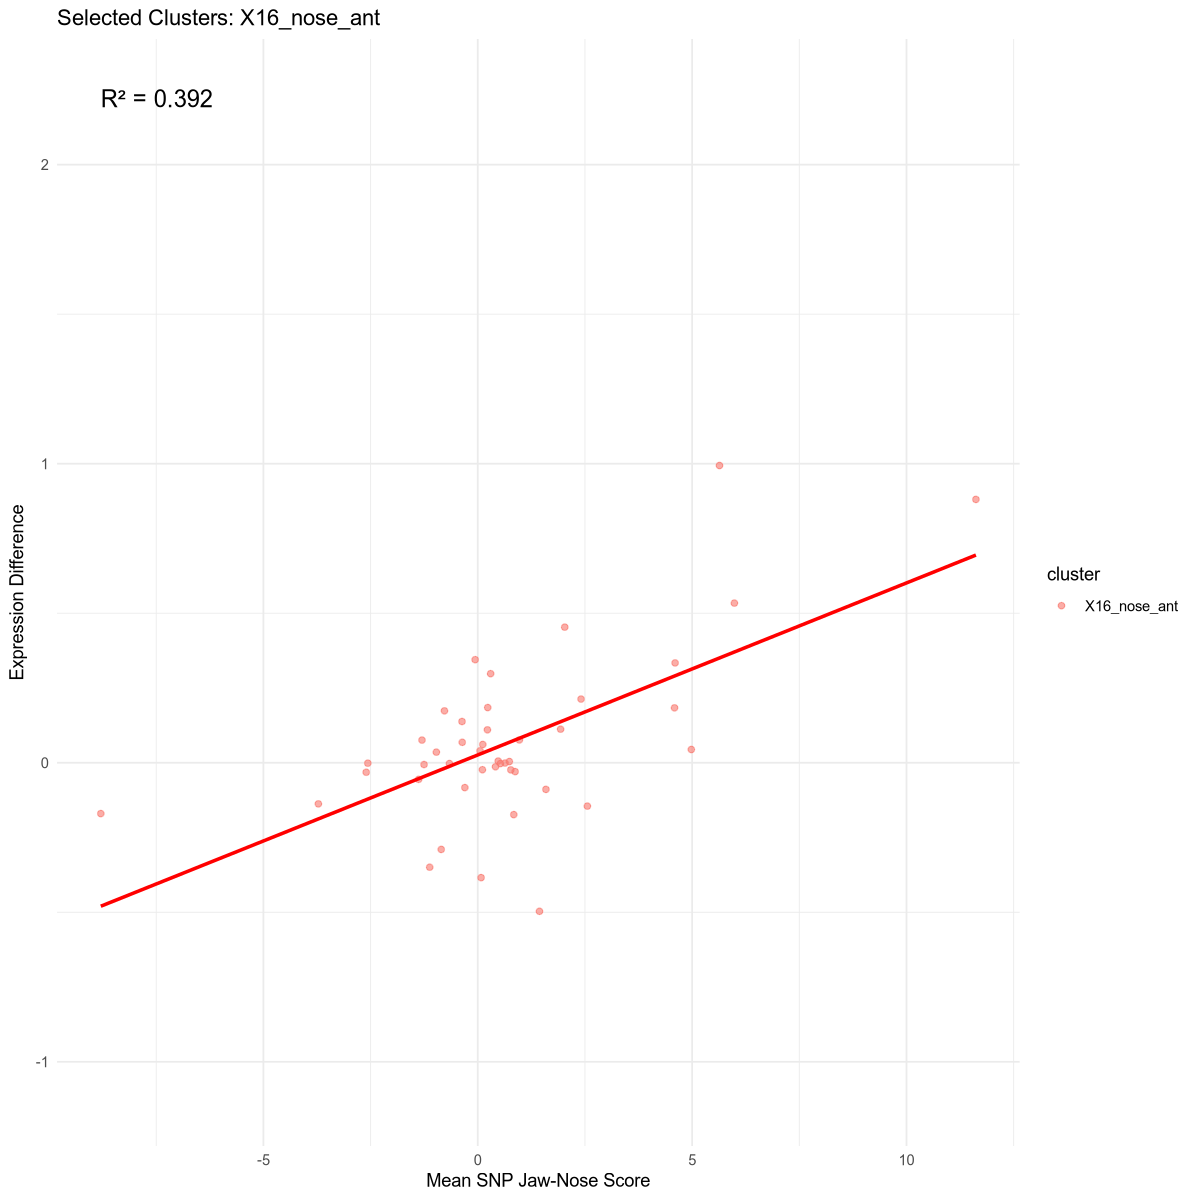

In [176]:
fit <- lm(expr_diff ~ score_avg, data = expr_long_sub)
r2 <- summary(fit)$r.squared

ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE),
           label = paste0("R² = ", round(r2, 3)),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”


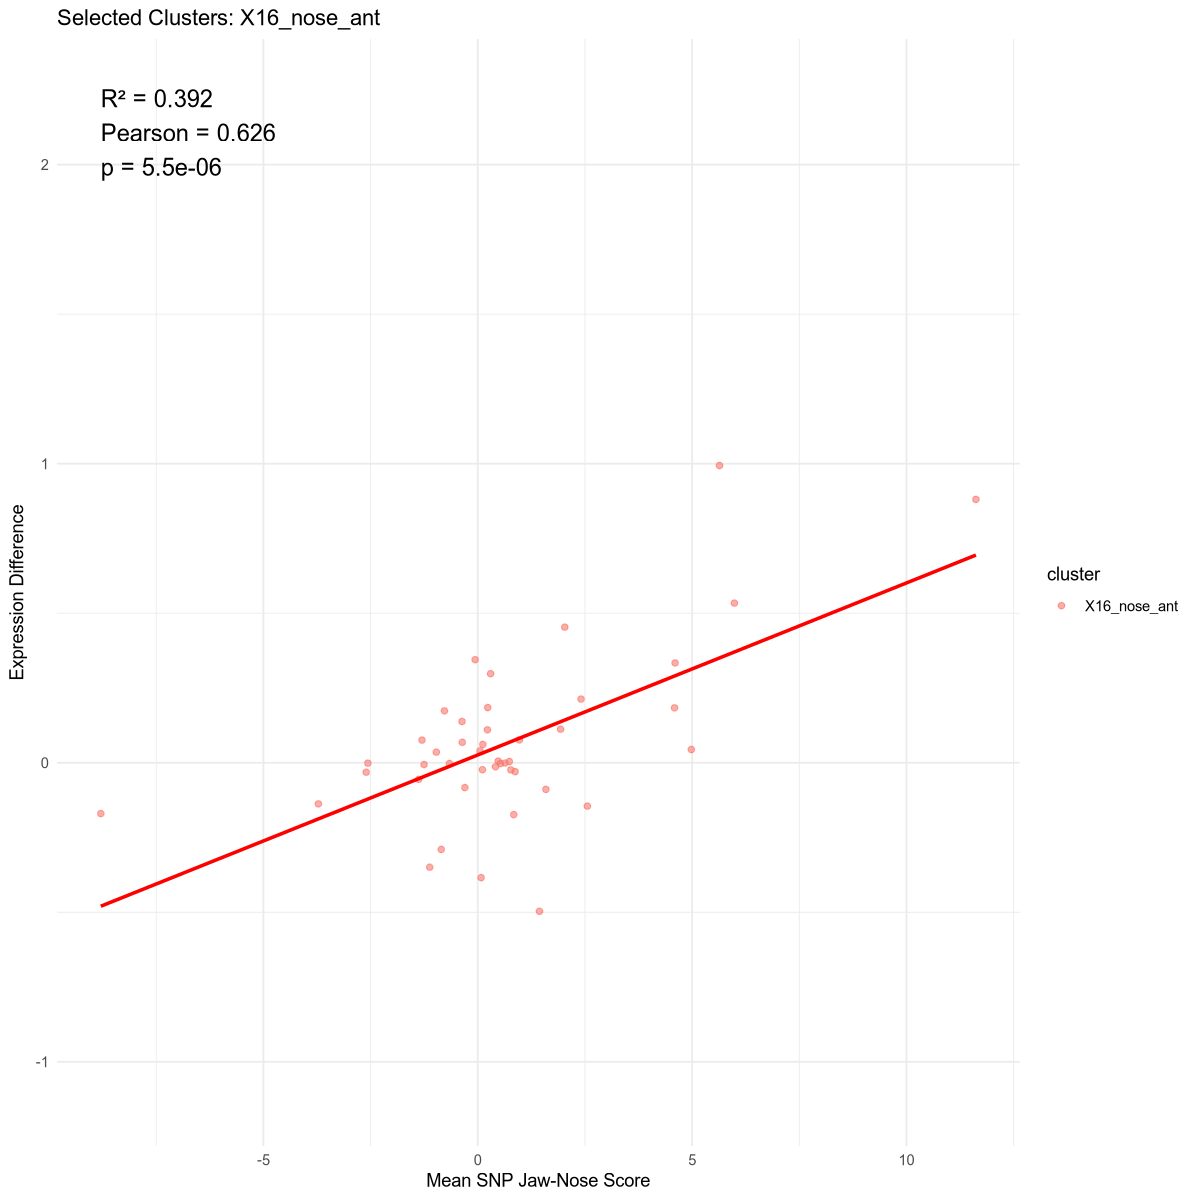

In [177]:
# Calculate linear model, R², Pearson correlation, and p-value
fit <- lm(expr_diff ~ score_avg, data = expr_long_sub)
r2 <- summary(fit)$r.squared
pearson <- cor(expr_long_sub$score_avg, expr_long_sub$expr_diff, use = "complete.obs")
pval <- summary(fit)$coefficients["score_avg", "Pr(>|t|)"]

ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE),
           label = paste0(
             "R² = ", round(r2, 3), "\n",
             "Pearson = ", round(pearson, 3), "\n",
             "p = ", signif(pval, 2)
           ),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_text()`).”


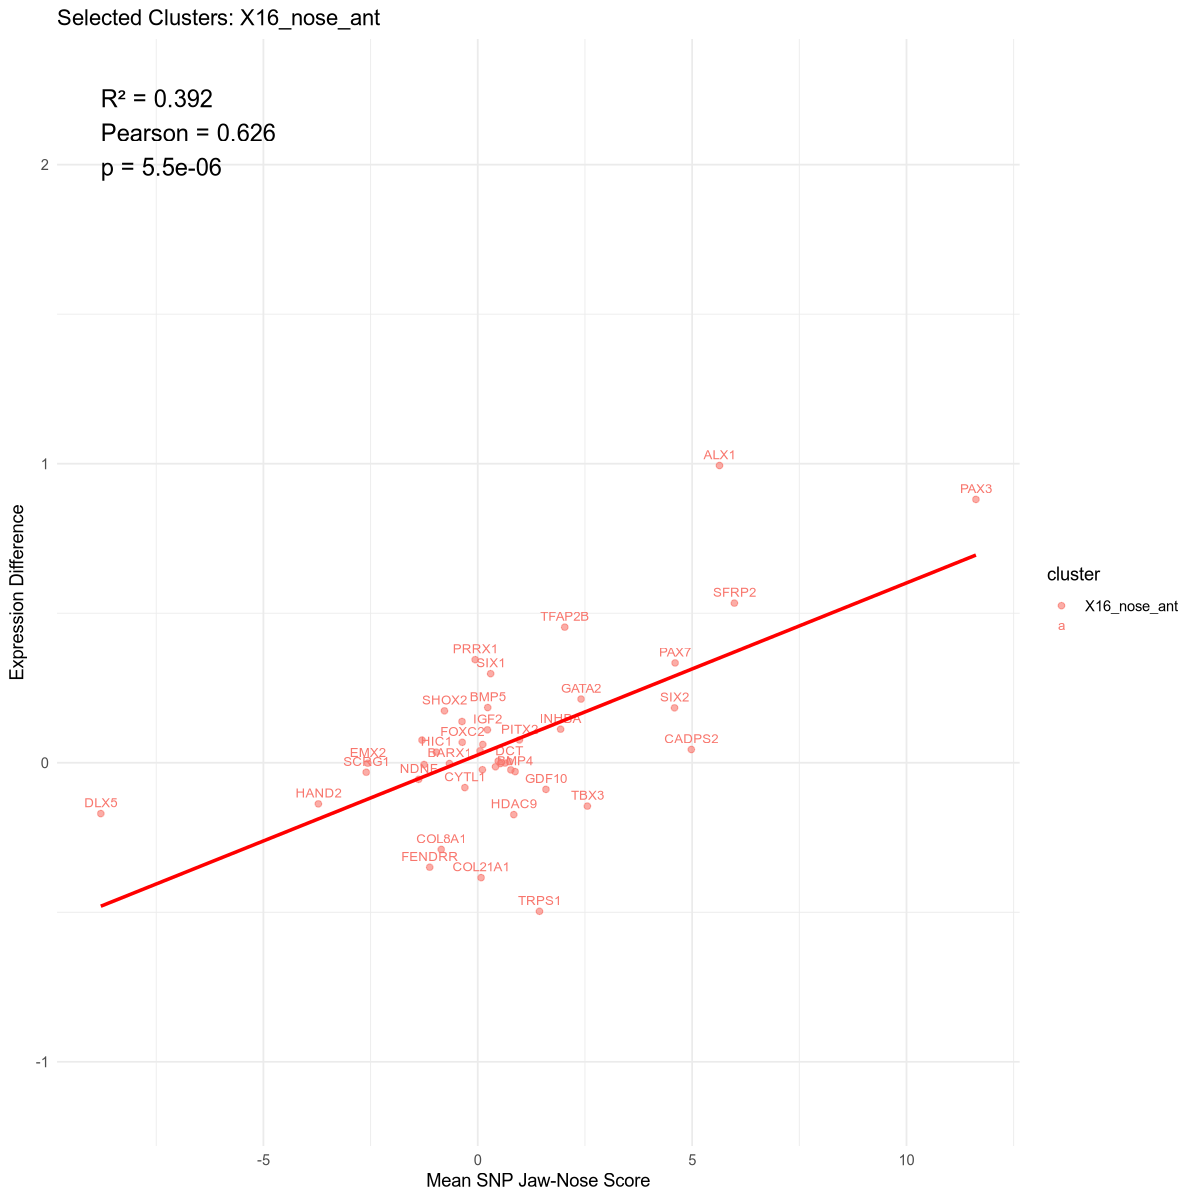

In [178]:
ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  geom_point(alpha = 0.6) +
  geom_text(aes(label = gene), hjust = 0.5, vjust = -0.7, size = 2.8, check_overlap = TRUE) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE),
           label = paste0(
             "R² = ", round(r2, 3), "\n",
             "Pearson = ", round(pearson, 3), "\n",
             "p = ", signif(pval, 2)
           ),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  theme_minimal()


In [179]:
library(ggrepel)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


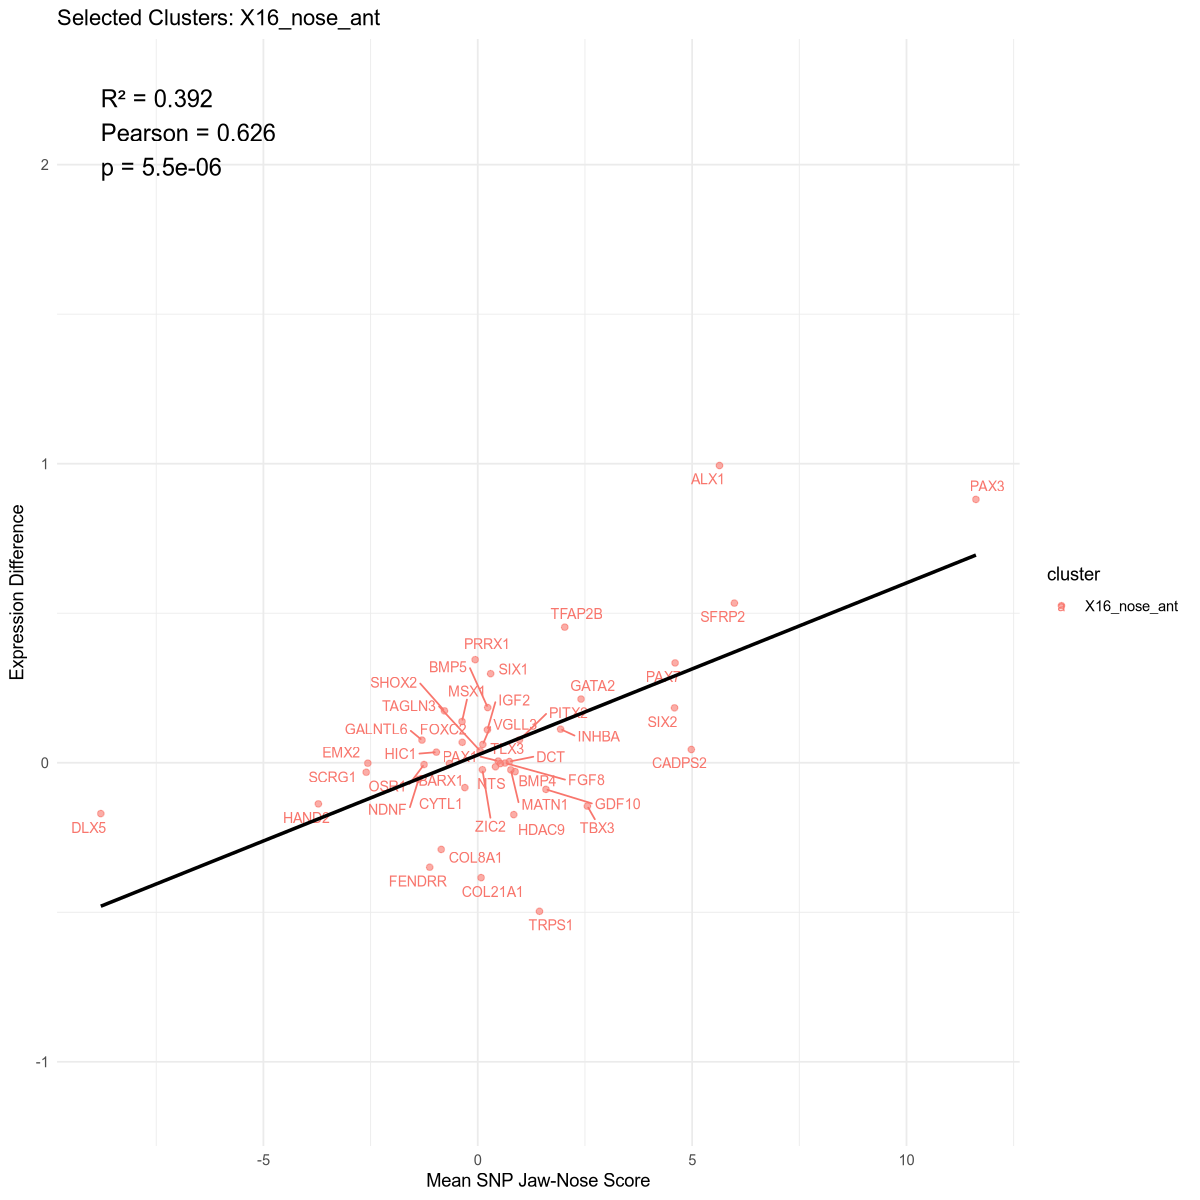

In [180]:
ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  geom_point(alpha = 0.6) +
  ggrepel::geom_text_repel(aes(label = gene), size = 3, max.overlaps = 25) +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE),
           label = paste0(
             "R² = ", round(r2, 3), "\n",
             "Pearson = ", round(pearson, 3), "\n",
             "p = ", signif(pval, 2)
           ),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


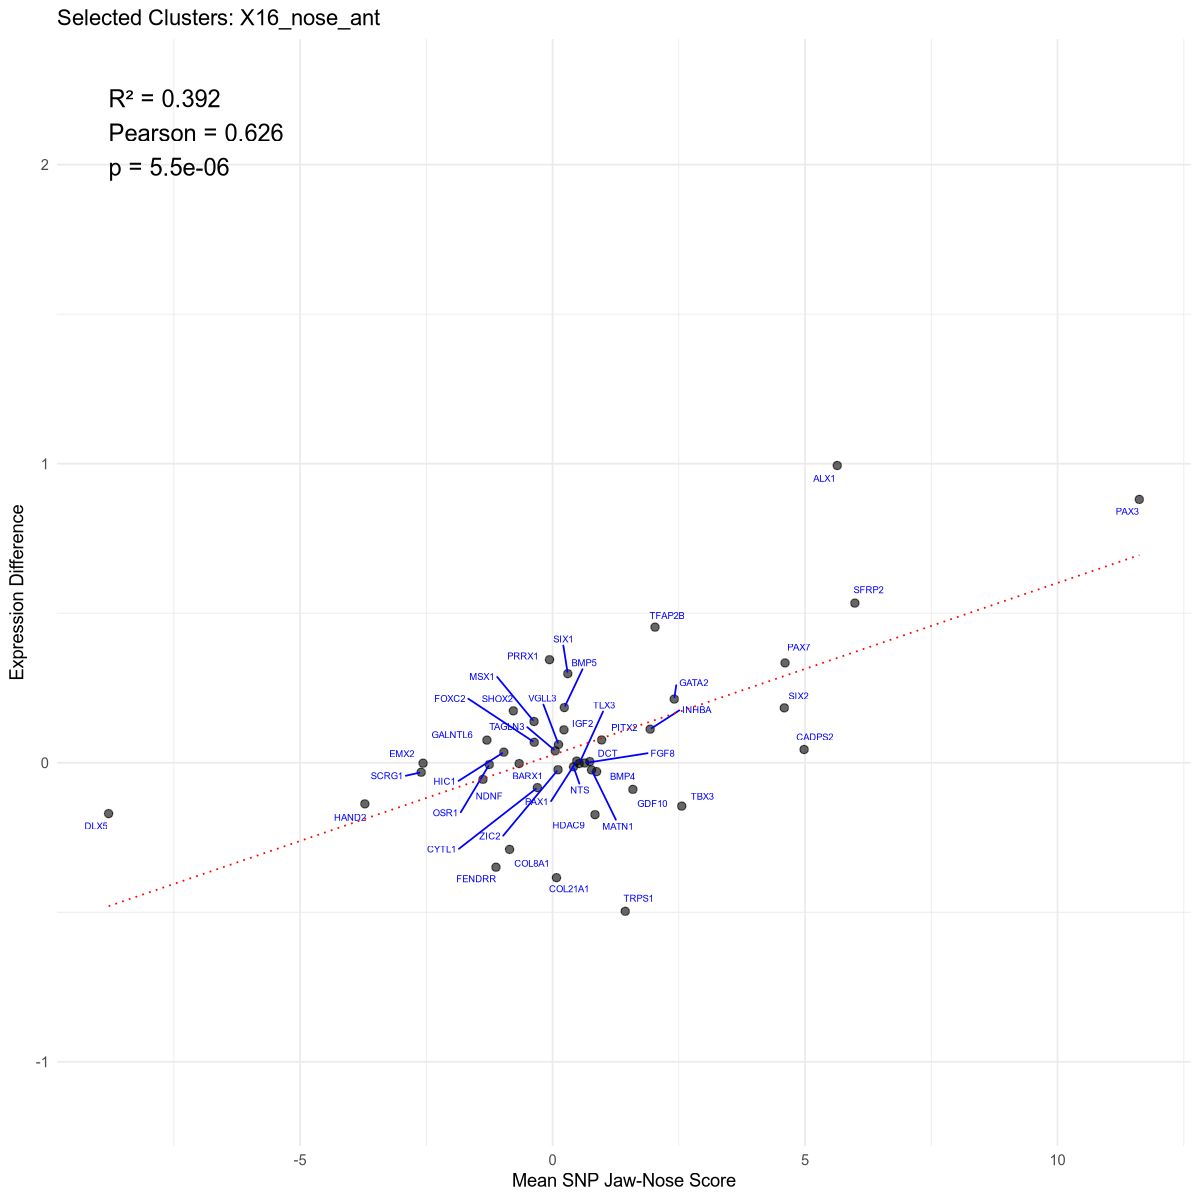

In [203]:
options(repr.plot.width=10, repr.plot.height=10)  # or adjust numbers as needed


ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  geom_point(alpha = 0.6, size = 2, color = "black") +
  ggrepel::geom_text_repel(
    aes(label = gene),
    color = "blue",            # Black gene names
    size = 2,
    force = 10,                  # Stronger repel (try 2-6)
    max.overlaps = 50           # Allow more labels if needed
  ) +
  geom_smooth(
    method = "lm",
    color = "red",
    se = FALSE,
    size = 0.5,                 # Thinner line
    linetype = "dotted"         # Dotted line
  ) +
  annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE),
           label = paste0(
             "R² = ", round(r2, 3), "\n",
             "Pearson = ", round(pearson, 3), "\n",
             "p = ", signif(pval, 2)
           ),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  theme_minimal()


In [213]:
pdf("cluster16_correlation.pdf", width = 7, height = 6)

ggplot(expr_long_sub, aes(x = score_avg, y = expr_diff, color = cluster)) +
  # Add thicker, darker intercept lines at x=0 and y=0
  geom_vline(xintercept = 0, color = "black", size = 0.25, linetype = "solid") +
  geom_hline(yintercept = 0, color = "black", size = 0.25, linetype = "solid") +
  geom_point(alpha = 0.6, size = 3, color = "red") +
  ggrepel::geom_text_repel(
    aes(label = gene),
    color = "light blue",
    size = 4,
    force = 25,
    max.overlaps = 50,
    segment.size = 0.2
  ) +
  geom_smooth(
    method = "lm",
    color = "red",
    se = FALSE,
    size = 0.5,
    linetype = "dotted"
  ) +
    annotate("text",
           x = min(expr_long_sub$score_avg, na.rm = TRUE),
           y = max(expr_long_sub$expr_diff, na.rm = TRUE) - 1.5,
           label = paste0(
             "R² = ", round(r2, 3), "\n",
             "Pearson = ", round(pearson, 3), "\n",
             "p = ", signif(pval, 2)
           ),
           hjust = 0, vjust = 1, size = 5, color = "black") +
  labs(
    x = "Mean SNP Jaw-Nose Score",
    y = "Expression Difference",
    title = paste0("Selected Clusters: ", paste(clusters_to_plot, collapse = ", "))
  ) +
  ylim(-.6, 1.1) +
  theme_minimal()
dev.off()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 328 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 328 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


pdf 
  2